In [1]:
setwd('/import/liujing/data/scRNA/')

library(cellcall)

scRNA = readRDS('scRNA.rds')




Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire i

In [2]:
table(scRNA$celltype)


     B_cell    Monocyte     NK_cell Neutrophils     T_cells 
         26         512         699       62087        2466 

In [3]:

library(Seurat)

# scRNA$celltype = gsub('Monocyte:CD16-','MonoCD16neg',scRNA$celltype)

# scRNA$celltype = gsub('Monocyte:CD16[:+:]','MonoCD16pos',scRNA$celltype)

scRNA$celltype = gsub('NK_cell','NK',scRNA$celltype)
scRNA$celltype = gsub('T_cells','Tcell',scRNA$celltype)
scRNA$celltype = gsub('B_cell','Bcell',scRNA$celltype)



table(scRNA$celltype)

table(scRNA$group)

Idents(scRNA) = 'group'

LS = subset(scRNA,idents = 'HBP')

library(Seurat)
library(dplyr)

Idents(LS) = 'celltype'
scRNA1 = LS
#scRNA1 = subset(LS, downsample = 500)

table(scRNA1$celltype)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
Attaching SeuratObject




      Bcell    Monocyte          NK Neutrophils       Tcell 
         26         512         699       62087        2466 


  HBP    LS 
31013 34777 

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union





      Bcell    Monocyte          NK Neutrophils       Tcell 
         12         228         339       29140        1294 

In [4]:
scRNA1

An object of class Seurat 
37487 features across 31013 samples within 1 assay 
Active assay: RNA (37487 features, 2000 variable features)
 3 dimensional reductions calculated: pca, umap, tsne

In [5]:
test = CreateObject_fromSeurat(Seurat.object=scRNA1,slot="counts",
                               cell_type="celltype",
                               data_source="UMI",
                               scale.factor =10^6,
                               Org = "Homo sapiens") 

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 8.7 GiB"


In [6]:
unique(scRNA1$celltype)

[1] "Neutrophils" "Tcell"       "Monocyte"    "NK"          "Bcell"

In [ ]:
mt <- TransCommuProfile(object = test,
                        pValueCor = 0.05,
                        CorValue = 0.1,
                        topTargetCor=1,
                        p.adjust = 0.5,
                        use.type="median",
                        probs = 0.8,
                        method="weighted",
                        IS_core = TRUE,
                        Org = 'Homo sapiens')

  Ligand_ID Receptor_ID TF_ID               Pathway Ligand_Symbol
1 100506658   100506658  2626 hsa04530_3,hsa04530_5          OCLN
2 100506658   100506658  8531            hsa04530_2          OCLN
3     10344        1230  2309            hsa04062_5         CCL26
4     10344        1230  3551            hsa04062_5         CCL26
  Receptor_Symbol TF_Symbol
1            OCLN     GATA4
2            OCLN      YBX3
3            CCR1     FOXO3
4            CCR1     IKBKB
[1] "step1: compute means of gene"
[1] "Neutrophils" "Tcell"       "Monocyte"    "NK"          "Bcell"      
[1] "Neutrophils"
[1] "Tcell"
[1] "Monocyte"
[1] "NK"
[1] "Bcell"
[1] "step2: filter tf-gene with correlation, then score regulons"
[1] "Neutrophils"


Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.75% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.75% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
"There were 1 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)"
Warning message in min(p):
"no non-missing arguments to min; returning Inf"
Warning message in max(p):
"no non-missing argumen

[1] 7
[1] "Tcell"


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.98% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in preparePathway

[1] 13
[1] "Monocyte"


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (6.35% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (6.35% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in cor(x, y, use = use, method = method):
"the stan

[1] 24
[1] "NK"


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (2.64% of the list).
The order of those tied genes 

[1] 15
[1] "Bcell"


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"

[1] 21
[1] "Neutrophils"
[1] 7


Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.75% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."


[1] "Tcell"
[1] 13


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"

[1] "Monocyte"
[1] 24


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"

[1] "NK"
[1] 15


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"

[1] "Bcell"
[1] 21


Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"

[1] "Neutrophils-Neutrophils"
[1] "Neutrophils-Tcell"
[1] "Neutrophils-Monocyte"
[1] "Neutrophils-NK"
[1] "Neutrophils-Bcell"
[1] "Tcell-Neutrophils"
[1] "Tcell-Tcell"
[1] "Tcell-Monocyte"
[1] "Tcell-NK"
[1] "Tcell-Bcell"
[1] "Monocyte-Neutrophils"
[1] "Monocyte-Tcell"
[1] "Monocyte-Monocyte"
[1] "Monocyte-NK"
[1] "Monocyte-Bcell"
[1] "NK-Neutrophils"
[1] "NK-Tcell"
[1] "NK-Monocyte"
[1] "NK-NK"
[1] "NK-Bcell"
[1] "Bcell-Neutrophils"
[1] "Bcell-Tcell"
[1] "Bcell-Monocyte"
[1] "Bcell-NK"
[1] "Bcell-Bcell"


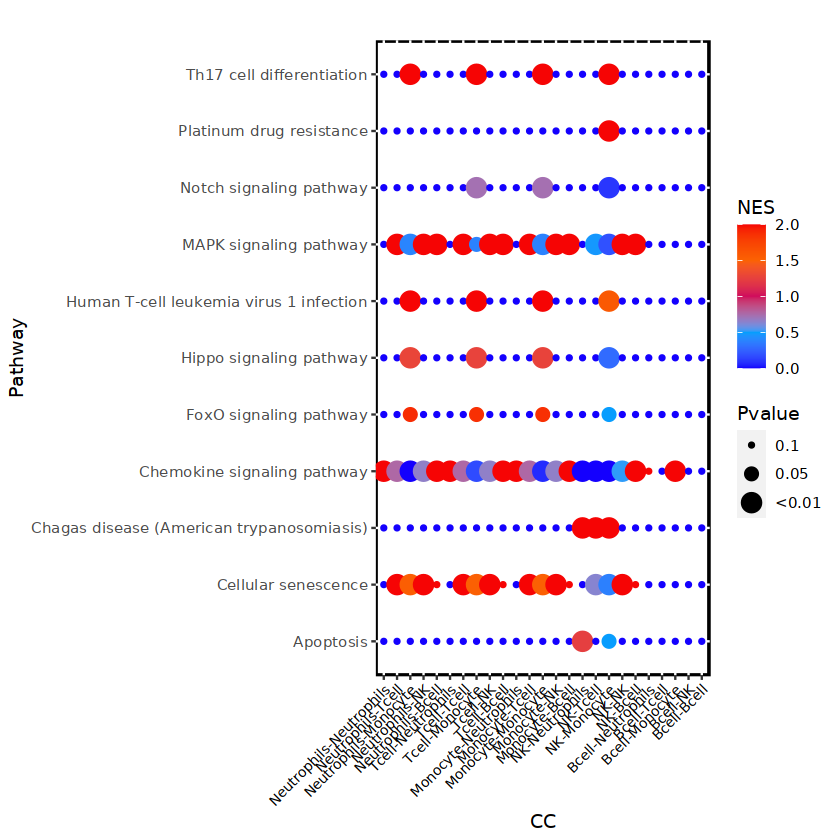

In [8]:
n <- mt@data$expr_l_r_log2_scale
pathway.hyper.list <- lapply(colnames(n), function(i){
    print(i)
tmp <- getHyperPathway(data = n, object = mt, cella_cellb = i, Org="Homo sapiens")
return(tmp)
})
myPub.df <- getForBubble(pathway.hyper.list, cella_cellb=colnames(n))
plotBubble(myPub.df)

In [9]:
unique(scRNA$celltype)

[1] "Neutrophils" "Tcell"       "Monocyte"    "NK"          "Bcell"

In [10]:
color = c('#A2DCEA', '#EE9C99',  '#43BEA7',  '#757FA3',  '#F2B8A7') #,  '#A7ABC4', '#8DD3C7'

In [11]:
cell_color <- data.frame(color=color, stringsAsFactors = FALSE)
rownames(cell_color) <- unique(scRNA1$celltype)

In [31]:
options(repr.plot.width = 8)

[1] 0
[1] 0
[1] 0
[1] 0.0460391
[1] 0.05295928
[1] 0.06404331
[1] 0.07656755
[1] 0.08207461
[1] 0.09502586
[1] 0.1289706
[1] 0.1723438
[1] 0.1744918
[1] 0.1757999
[1] 0.1943426
[1] 0.2304653
[1] 0.2398121
[1] 0.290037
[1] 0.3124138
[1] 0.3272609
[1] 0.3535343
[1] 0.420735
[1] 0.4671236
[1] 0.6965722
[1] 0.7181067
[1] 1


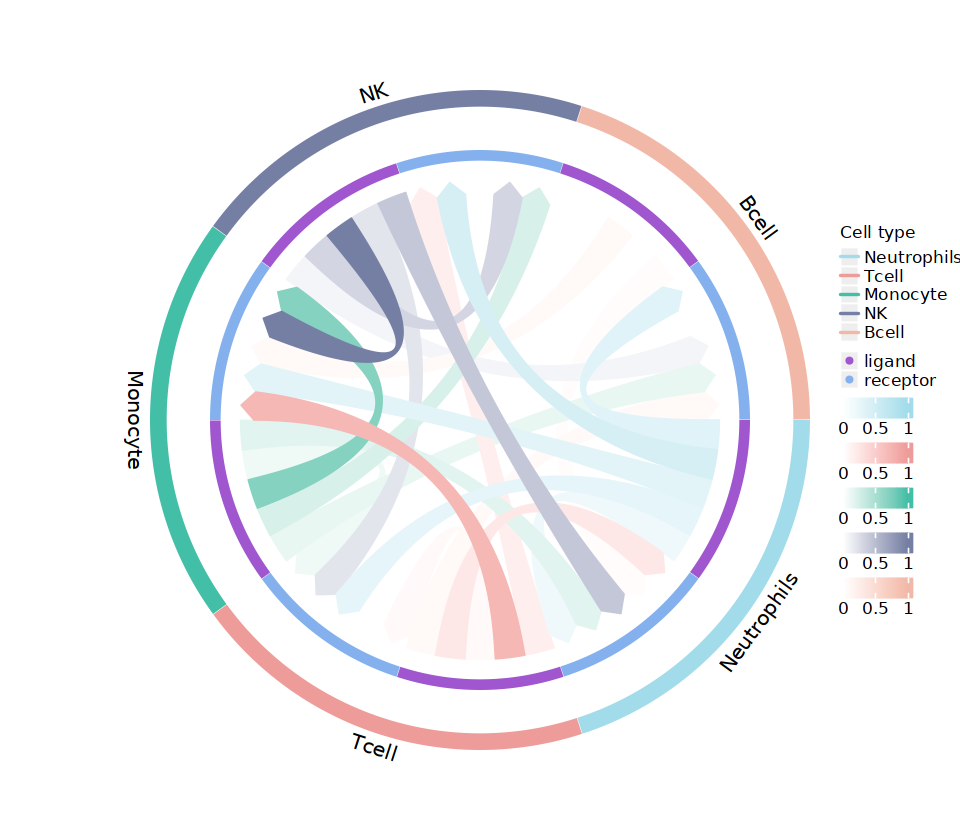

In [32]:
ViewInterCircos(object = mt@data$expr_l_r_log2_scale, font = 2,
                cellColor = cell_color,
                lrColor = c("#9F56CF", "#84B1ED"),
                trackhight1 = 0.05, slot="expr_l_r_log2_scale",
                linkcolor.from.sender = TRUE,
                linkcolor = NULL, gap.degree = 0.1,
                order.vector=unique(scRNA$celltype),
                trackhight2 = 0.032, track.margin2 = c(0.05,0.12), DIY = T)

In [27]:
options(repr.plot.width = 15)

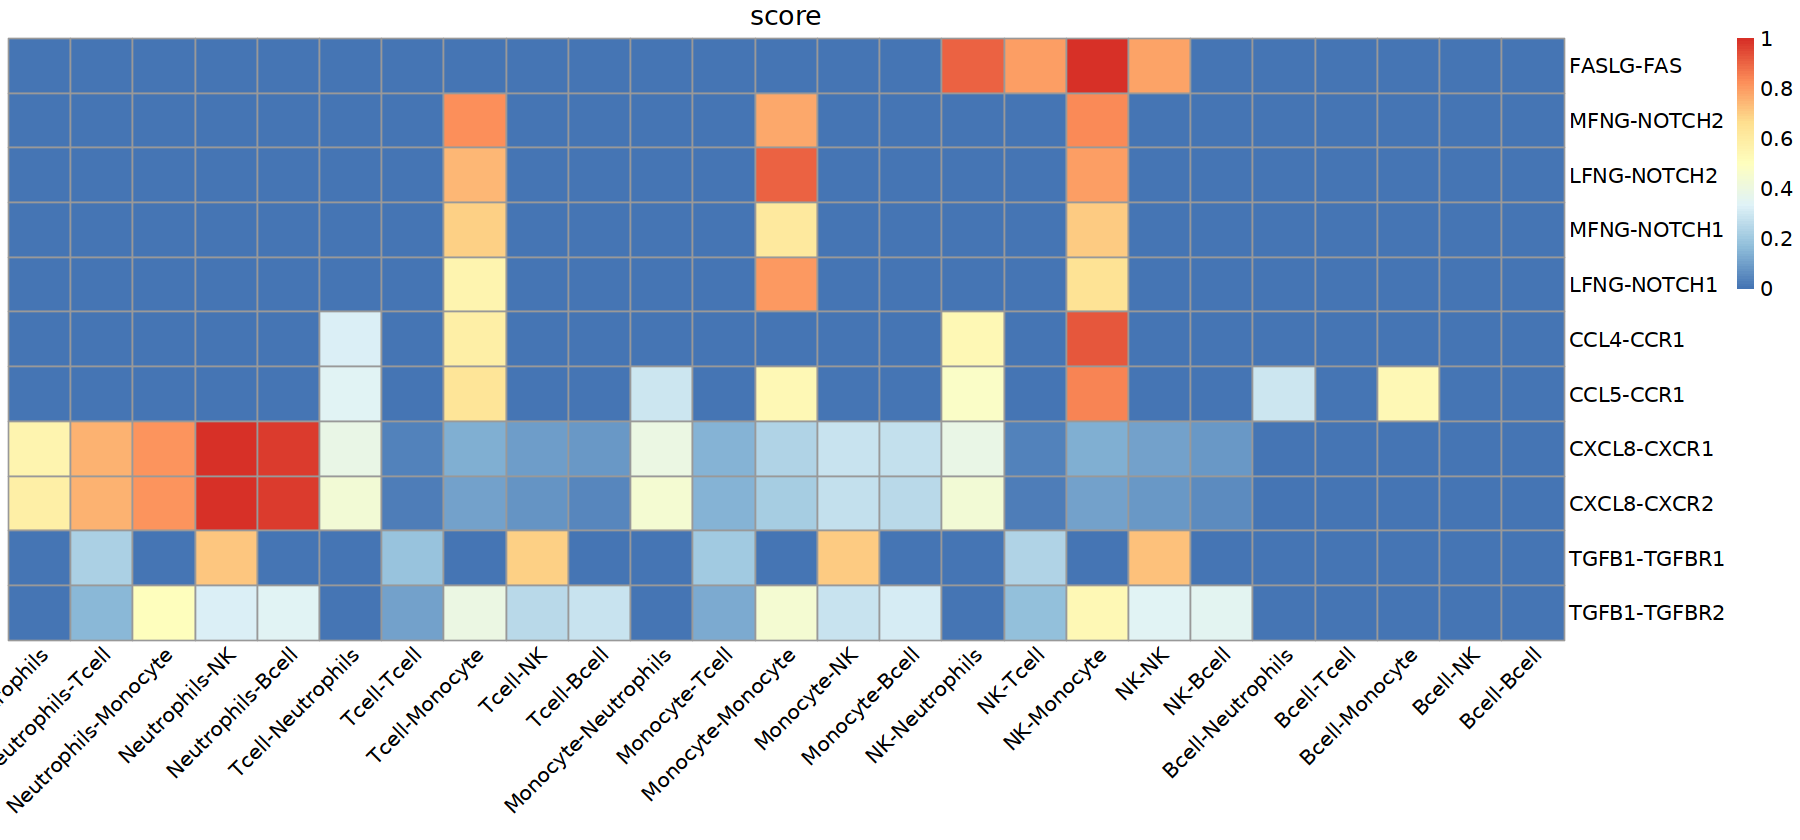

In [28]:
viewPheatmap(object = mt, slot="expr_l_r_log2_scale", show_rownames = T,
             show_colnames = T,treeheight_row=0, treeheight_col=10,
             cluster_rows = T,cluster_cols = F,fontsize = 12,angle_col = "45",
             main="score")

In [29]:
LS.order = colnames(mt@data$expr_l_r_log2_scale)

In [30]:
save(LS.order,file = 'LS.order.rda')

In [18]:
mt1 <- LR2TF(object = mt, sender_cell="NK", recevier_cell="Monocyte",
             slot="expr_l_r_log2_scale", org="Homo sapiens")

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


In [19]:
library(magrittr)
library(dplyr)
tmp <- mt1@reductions$sankey
tmp1 <- dplyr::filter(tmp, weight1>0)
tmp.df <- trans2tripleScore(tmp1)
head(tmp.df)

Warning message:
"package 'magrittr' was built under R version 4.2.3"


,Ligand,Receptor,TF,value
,<chr>,<chr>,<chr>,<dbl>
1,sender:FASLG,receiver:FAS,TF:ATF4,0.1284856
2,sender:FASLG,receiver:FAS,TF:ATM,0.2650587
3,sender:FASLG,receiver:FAS,TF:JUN,0.1910996
4,sender:FASLG,receiver:FAS,TF:MEF2C,0.1573625
5,sender:FASLG,receiver:FAS,TF:RELA,0.2523939
6,sender:CCL4,receiver:CCR1,TF:IKBKB,0.2221642


In [20]:
mycol.vector = c('#5d62b5','#29c3be','#f2726f','#62b58f','#bc95df', '#67cdf2', '#ffc533', '#5d62b5', '#29c3be')
elments.num = tmp.df %>% unlist %>% unique %>% length()

Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
i The deprecated feature was likely used in the cellcall package.
  Please report the issue to the authors."


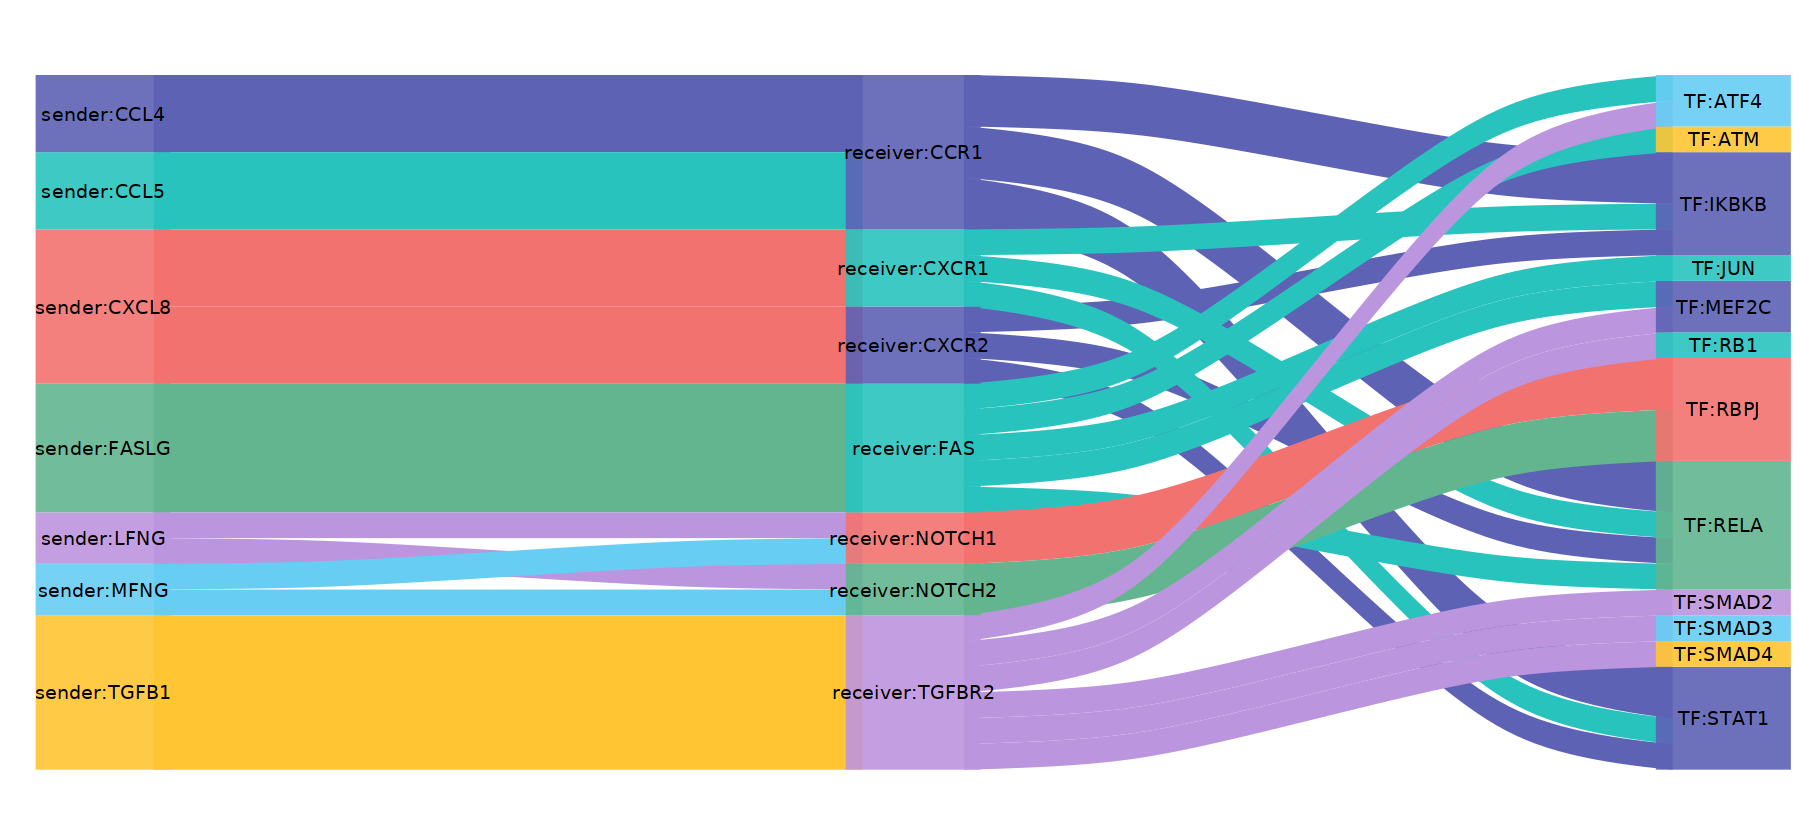

In [21]:
mycol.vector.list <- rep(mycol.vector, times=ceiling(elments.num/length(mycol.vector)))
sankey_graph(df = tmp.df, axes=1:3, mycol = mycol.vector.list[1:elments.num], nudge_x = NULL, font.size = 4, boder.col="white", isGrandSon = F)

In [22]:
tmp <- mt1@reductions$sankey
tmp1 <- dplyr::filter(tmp, weight1>0)
tmp.df <- trans2tripleScore(tmp1)
mycol.vector = c('#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2')
elments.num = length(unique(tmp.df$Ligand))

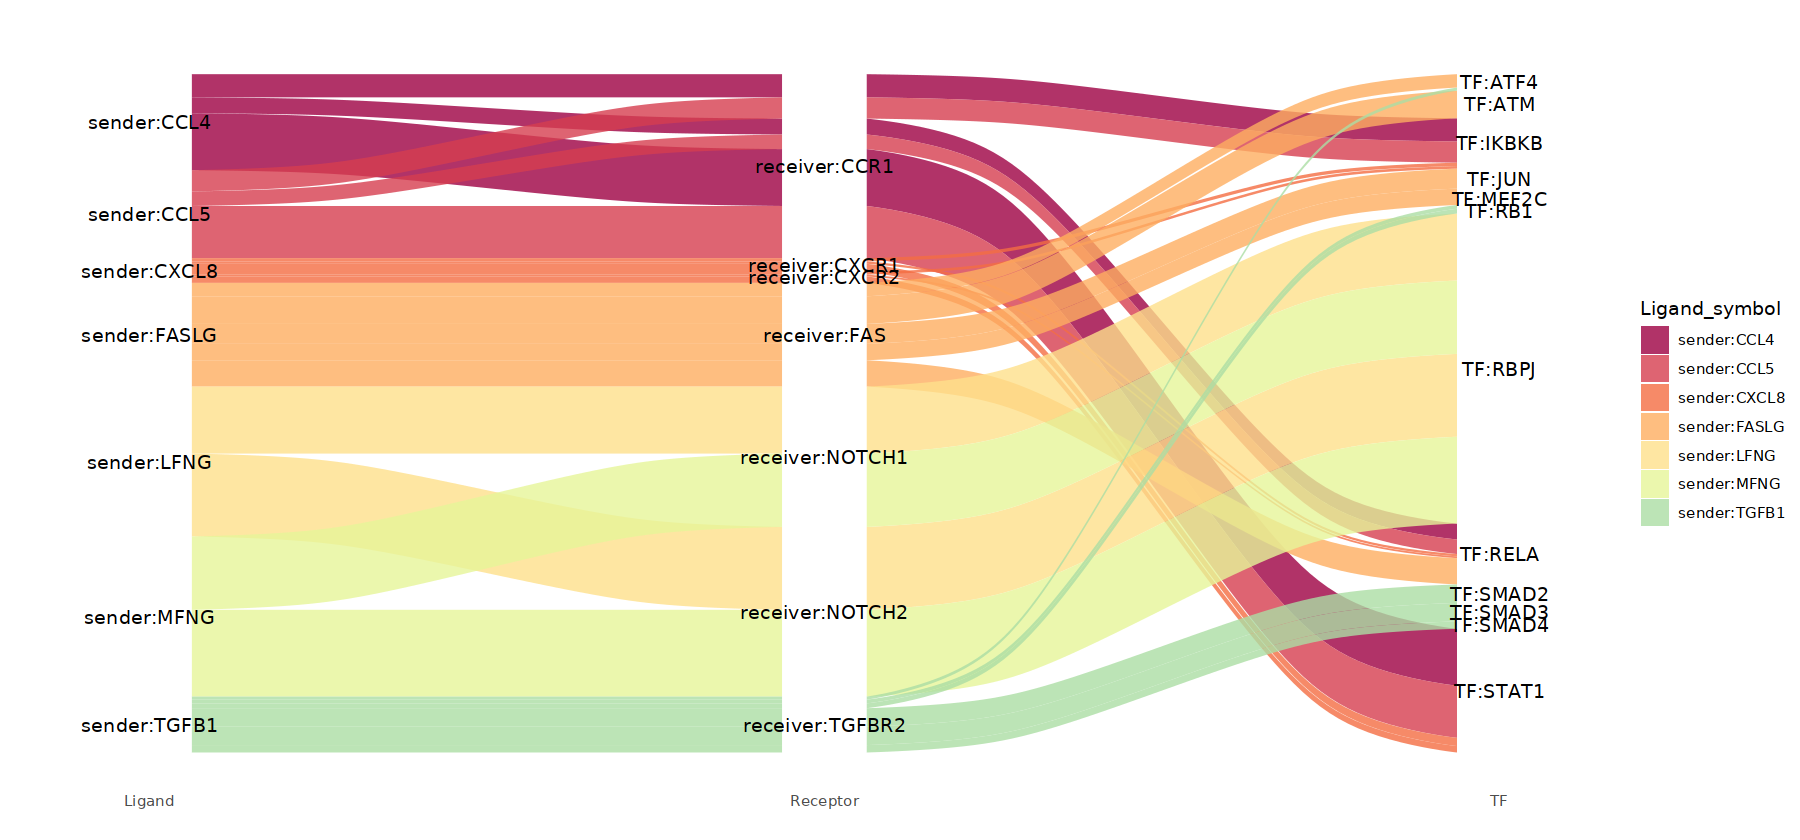

In [23]:

mycol.vector.list= rep(mycol.vector, times=ceiling(elments.num/length(mycol.vector)))
sankey_graph(df = tmp.df, axes=1:3, mycol = mycol.vector.list[1:elments.num],isGrandSon = TRUE, 
             nudge_x = nudge_x, font.size = 4, boder.col="white",
             set_alpha = 0.8)

In [24]:
names(mt@data$gsea.list$Monocyte@geneSets)

[1] "ATF4"   "ATM"    "CREB1"  "CTNNB1" "FOXO1"  "GTF2I"  "HIF1A"  "ID2"   
 [9] "IKBKB"  "JUN"    "MED1"   "MEF2C"  "MEF2D"  "NR1H2"  "RB1"    "RBPJ"  
[17] "RELA"   "RXRA"   "SIRT1"  "SMAD2"  "SMAD3"  "SMAD4"  "STAT1"  "STAT6"

In [25]:
getGSEAplot(gsea.list=mt@data$gsea.list, geneSetID=c("JUND","STAT2"),
            myCelltype="Monocyte", fc.list=mt@data$fc.list,
            #selectedGeneID = mt@data$gsea.list$Monocyte@geneSets$JUND[1:10],
            mycol = NULL)

ERROR: Error in if (abs(max.ES) > abs(min.ES)) {: missing value where TRUE/FALSE needed


### t> monocyte

In [25]:
mt1 <- LR2TF(object = mt, sender_cell="Tcell", recevier_cell="Monocyte",
             slot="expr_l_r_log2_scale", org="Homo sapiens")

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9


In [26]:
library(magrittr)
library(dplyr)
tmp <- mt1@reductions$sankey
tmp1 <- dplyr::filter(tmp, weight1>0)
tmp.df <- trans2tripleScore(tmp1)
head(tmp.df)

,Ligand,Receptor,TF,value
,<chr>,<chr>,<chr>,<dbl>
1,sender:MFNG,receiver:NOTCH2,TF:RBPJ,0.79196891
2,sender:CCL5,receiver:CCR1,TF:IKBKB,0.11207395
3,sender:CCL5,receiver:CCR1,TF:RELA,0.07641865
4,sender:CCL5,receiver:CCR1,TF:STAT1,0.27886092
5,sender:CCL5,receiver:CCR1,TF:STAT2,0.27195887
6,sender:LFNG,receiver:NOTCH2,TF:RBPJ,0.70116254


In [27]:
mycol.vector = c('#5d62b5','#29c3be','#f2726f','#62b58f','#bc95df', '#67cdf2', '#ffc533', '#5d62b5', '#29c3be')
elments.num = tmp.df %>% unlist %>% unique %>% length()

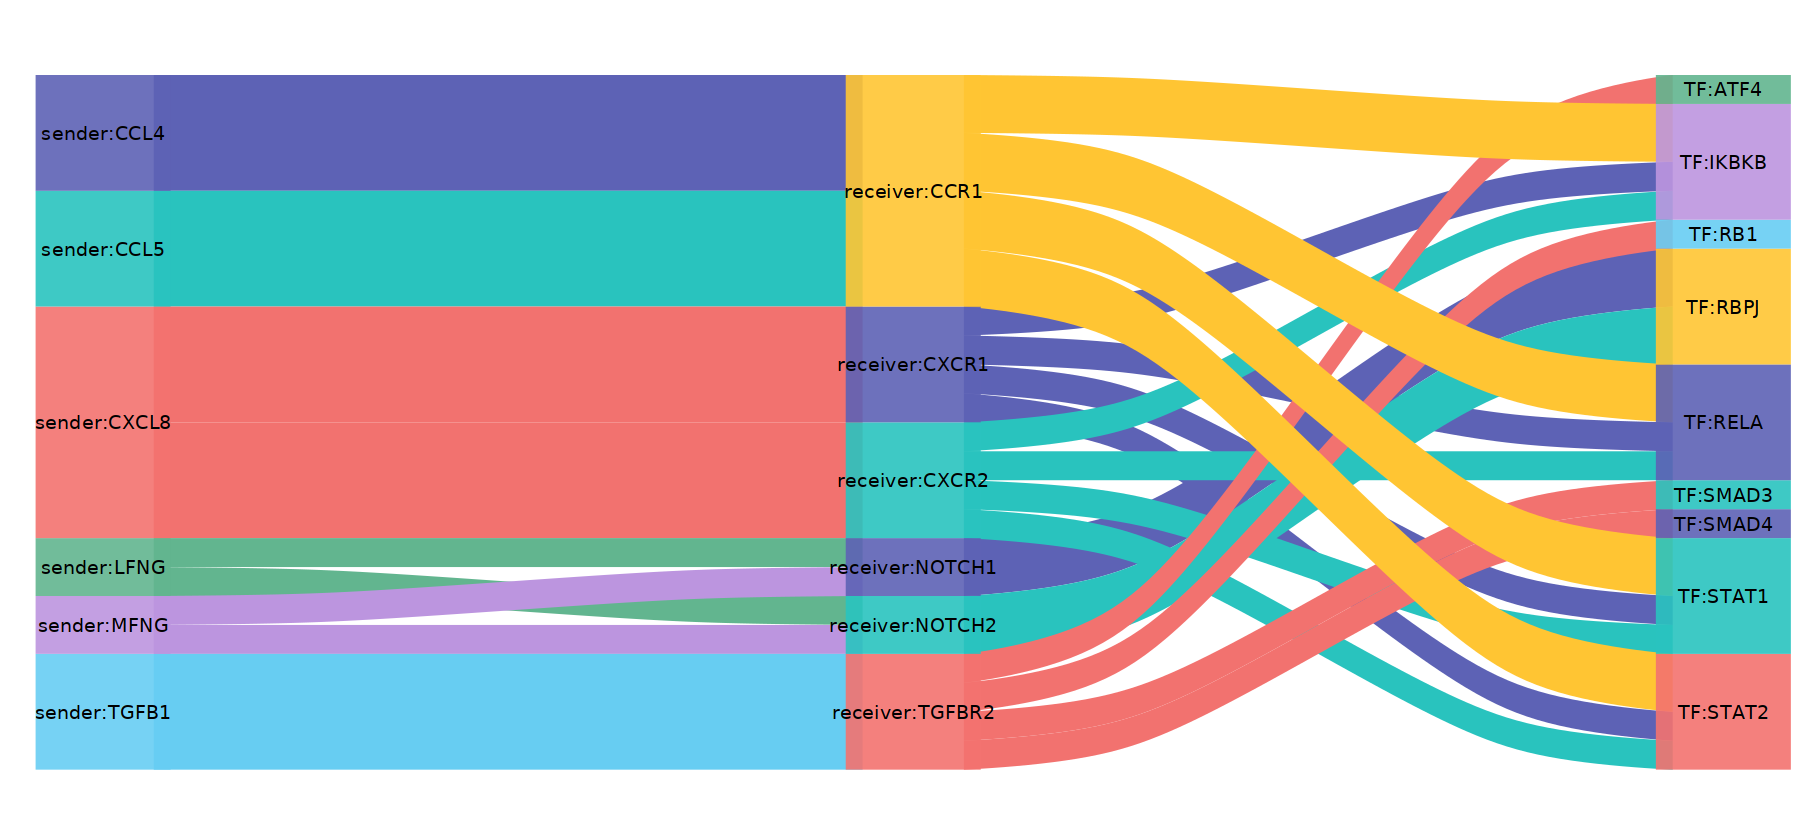

In [28]:
mycol.vector.list <- rep(mycol.vector, times=ceiling(elments.num/length(mycol.vector)))
sankey_graph(df = tmp.df, axes=1:3, mycol = mycol.vector.list[1:elments.num], nudge_x = NULL, font.size = 4, boder.col="white", isGrandSon = F)